# Course Description
Have you ever wondered how to properly prepare for a Machine Learning Interview? Of course you have or you likely wouldn't be reading this right now! In this course, students will prepare to answer 15 common Machine Learning (ML) interview questions for a data scientist role in Python. These questions will revolve around 7 important topics: data preprocessing, data visualization, supervised learning, unsupervised learning, model ensembling, model selection, and model evaluation. By the end of the course, the students will possess both the required theoretical background and the ability to develop Python code to successfully answer these 15 questions. The coding examples will be mainly based on the scikit-learn package given its ease-of-use and ability to cover the most important ML techniques in the Python language.

In [112]:
# Import modules 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import boxcox, zscore, mstats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LarsCV, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, silhouette_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from vecstack import stacking
from xgboost import XGBClassifier
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster import hierarchy as sch
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

In [2]:
diabetes = pd.read_csv('diabetes.csv')
loan_data = pd.read_csv('LoansTrainingSetReduced.csv')

![Pipeline](pipeline-3.png)

## Data Pre-processing and Visualization

In [3]:
# Print missing values
print(loan_data.isna().sum())

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job                0
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    48506
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      192
Tax Liens                           8
dtype: int64


In [4]:
# Drop rows with missing values
dropNArows = loan_data.dropna(axis = 0)

# Print percentage of rows remaining
print(dropNArows.shape[0]/loan_data.shape[0] * 100)

34.347092565515695


In [5]:
# Drop columns with missing values
dropNAcols = loan_data.dropna(axis=1)

# Print percentage of columns remaining
print(dropNAcols.shape[1]/loan_data.shape[1] * 100)

70.58823529411765


In [6]:
# Fill missing values with zero
loan_data_filled = loan_data.fillna(0)

# Examine 'Credit Score' before
print(loan_data['Credit Score'].describe())

# Examine 'Credit Score' after
print(loan_data_filled['Credit Score'].describe())

count    67572.000000
mean       721.601951
std         27.427709
min        585.000000
25%        710.000000
50%        730.000000
75%        741.000000
max        751.000000
Name: Credit Score, dtype: float64
count    88910.000000
mean       548.420729
std        309.109970
min          0.000000
25%        632.000000
50%        719.000000
75%        739.000000
max        751.000000
Name: Credit Score, dtype: float64


**The important thing to notice here is that removing rows or columns in this case reduces the dataset way too much to be useful.**

### Simple imputation

![Pipeline](pipeline-4.png)

In [7]:
# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=[object])

# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_meanDF = pd.DataFrame(loans_imp_mean, columns=numeric_cols.columns)

# Check the DataFrame's info
print(loans_imp_meanDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88910 non-null  float64
 1   Credit Score                  88910 non-null  float64
 2   Years in current job          88910 non-null  float64
 3   Annual Income                 88910 non-null  float64
 4   Monthly Debt                  88910 non-null  float64
 5   Years of Credit History       88910 non-null  float64
 6   Months since last delinquent  88910 non-null  float64
 7   Number of Open Accounts       88910 non-null  float64
 8   Number of Credit Problems     88910 non-null  float64
 9   Current Credit Balance        88910 non-null  float64
 10  Maximum Open Credit           88910 non-null  float64
 11  Bankruptcies                  88910 non-null  float64
 12  Tax Liens                     88910 non-null  float64
dtypes

### Iterative imputation

In [8]:
# Iteratively impute
imp_iter = IterativeImputer(max_iter=5, sample_posterior=True, random_state=123)
loans_imp_iter = imp_iter.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_iterDF = pd.DataFrame(loans_imp_iter, columns=numeric_cols.columns)
loans_imp_iterDF.head()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,12232.0,728.0,1.0,46643.0,777.39,18.0,10.000000,12.0,0.0,6762.0,7946.0,0.0,0.0
1,25014.0,733.0,10.0,81099.0,892.09,26.7,34.756537,14.0,0.0,35706.0,77961.0,0.0,0.0
2,16117.0,724.0,9.0,60438.0,1244.02,16.7,32.000000,11.0,1.0,11275.0,14815.0,1.0,0.0
3,11716.0,740.0,3.0,34171.0,990.94,10.0,24.479370,21.0,0.0,7009.0,43533.0,0.0,0.0
4,9789.0,686.0,10.0,47003.0,503.71,16.7,25.000000,13.0,1.0,16913.0,19553.0,1.0,0.0


## Train/test distributions

![Pipeline](pipeline-5.png)

<Figure size 432x288 with 0 Axes>

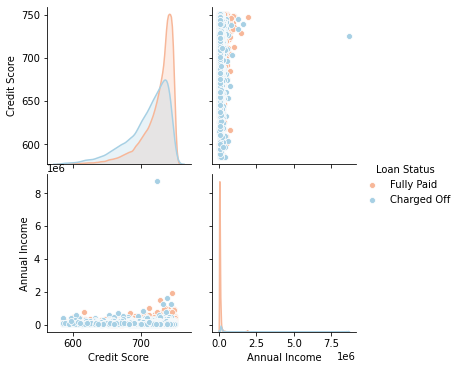

<Figure size 432x288 with 0 Axes>

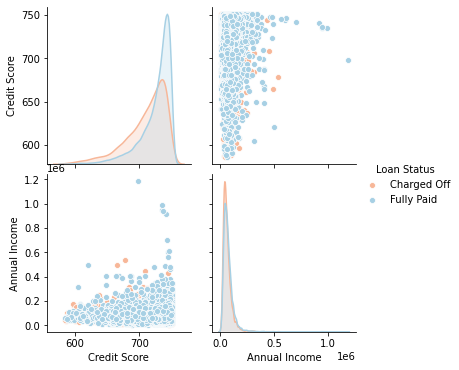

In [9]:
# Create `loan_data` subset: loan_data_subset
loan_data_subset = loan_data[['Credit Score','Annual Income','Loan Status']]

# Create train and test sets
trainingSet, testSet = train_test_split(loan_data_subset, test_size=0.20, random_state=123)

# Examine pairplots
plt.figure()
sns.pairplot(trainingSet, hue='Loan Status', palette='RdBu')
plt.show()

plt.figure()
sns.pairplot(testSet, hue='Loan Status', palette='RdBu')
plt.show()

 **It is evident that `trainingSet` and `testSet` have different distributions when conditioned on the Loan Status target variable.**

### Log and power transformations

![Pipeline](pipeline-6.png)

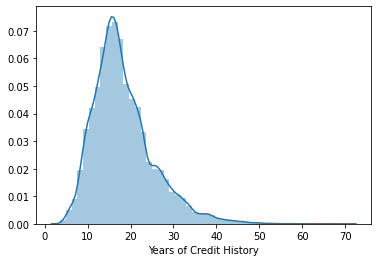

In [10]:
# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs)
plt.show()

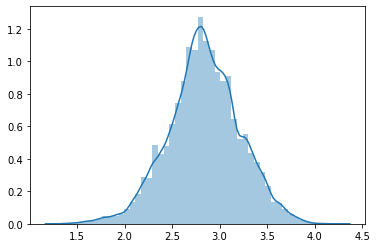

In [11]:
# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Box-Cox transformation
cr_yrs_log = boxcox(cr_yrs, lmbda=0)

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs_log)
plt.show()

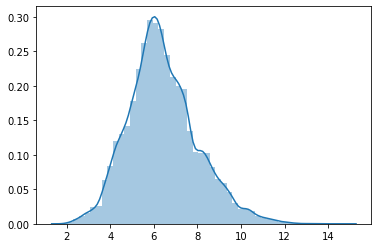

In [12]:
# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Square root transform
cr_yrs_sqrt = boxcox(cr_yrs, lmbda=0.5)

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs_sqrt)
plt.show()

### Outlier detection

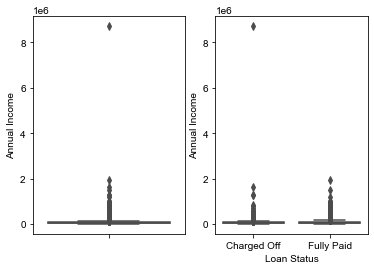

In [13]:
# Univariate and multivariate boxplots
fig, ax =plt.subplots(1,2)
sns.set(font_scale=1.0)
sns.boxplot(y=loan_data['Annual Income'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Annual Income', data=loan_data, ax=ax[1])
plt.show()

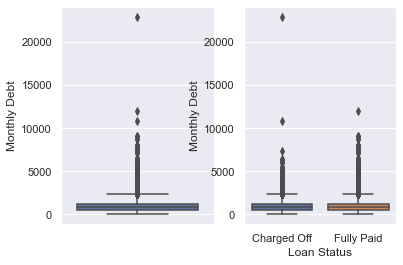

In [14]:
# Multivariate boxplot
fig, ax =plt.subplots(1,2)
sns.boxplot(y=loan_data['Monthly Debt'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Monthly Debt', data=loan_data, ax=ax[1])
plt.show()

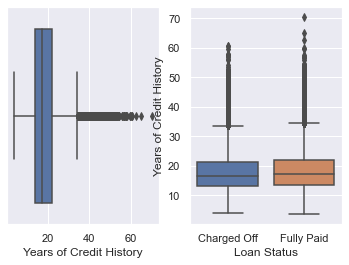

In [15]:
# Univariate and multivariate boxplots
fig, ax =plt.subplots(1,2)
sns.boxplot(x=loan_data['Years of Credit History'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Years of Credit History', data=loan_data, ax=ax[1])
plt.show()

**`loan_data` has outliers that need to be addressed.**

### Handling outliers

In [16]:
# Print: before dropping
print(numeric_cols.mean())
print(numeric_cols.median())
print(numeric_cols.max())

# Create index of rows to keep
idx = (np.abs(zscore(numeric_cols)) < 3).all(axis=1)

# Concatenate numeric and categoric subsets
ld_out_drop = pd.concat([numeric_cols.loc[idx], categoric_cols.loc[idx]], axis=1)

# Print: after dropping
print(ld_out_drop.mean())
print(ld_out_drop.median())
print(ld_out_drop.max())

Current Loan Amount             1.433878e+07
Credit Score                    7.216020e+02
Years in current job            5.721263e+00
Annual Income                   7.234575e+04
Monthly Debt                    9.631021e+02
Years of Credit History         1.831531e+01
Months since last delinquent    3.508029e+01
Number of Open Accounts         1.111035e+01
Number of Credit Problems       1.604769e-01
Current Credit Balance          1.543593e+04
Maximum Open Credit             3.356812e+04
Bankruptcies                    1.126716e-01
Tax Liens                       2.822209e-02
dtype: float64
Current Loan Amount             14355.000
Credit Score                      730.000
Years in current job                6.000
Annual Income                   61494.000
Monthly Debt                      843.925
Years of Credit History            17.000
Months since last delinquent       32.000
Number of Open Accounts            10.000
Number of Credit Problems           0.000
Current Credit Balance

In [17]:
# Print: before winsorize
print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

# Winsorize numeric columns
debt_win = mstats.winsorize(loan_data['Monthly Debt'], limits=[0.05, 0.05])

# Convert to DataFrame, reassign column name
debt_out = pd.DataFrame(debt_win, columns=['Monthly Debt'])

# Print: after winsorize
print(debt_out.mean())
print(debt_out.median())
print(debt_out.max())

963.1020592734293
843.925
22939.12
Monthly Debt    935.371257
dtype: float64
Monthly Debt    843.925
dtype: float64
Monthly Debt    2115.52
dtype: float64


In [18]:
# Print: before replace with median
print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

# Find median
median = loan_data.loc[loan_data['Monthly Debt'] < 2120, 'Monthly Debt'].median()
loan_data['Monthly Debt'] = np.where(loan_data['Monthly Debt'] > 2120, median, loan_data['Monthly Debt'])

print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

963.1020592734293
843.925
22939.12
866.8290722078564
811.51
2119.72


**Notice how the median didn't change when you dropped or winsorized, but it did when you replaced outliers with the median in the last step. This is because only the right tail outliers got replaced causing the median to shift!**

### Z-score standardization

In [19]:
# Subset features
numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=[object])

# Instantiate
scaler = StandardScaler()

# Fit and transform, convert to DF
numeric_cols_scaled = scaler.fit_transform(numeric_cols)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)

# Concatenate categoric columns to scaled numeric columns
final_DF = pd.concat([categoric_cols, numeric_cols_scaledDF], axis=1)
print(final_DF.head())

   Loan Status        Term Home Ownership            Purpose  \
0  Charged Off  Short Term           Rent  DebtConsolidation   
1  Charged Off   Long Term       Mortgage  DebtConsolidation   
2  Charged Off  Short Term       Mortgage   HomeImprovements   
3  Charged Off  Short Term           Rent  DebtConsolidation   
4  Charged Off   Long Term       Mortgage   HomeImprovements   

   Current Loan Amount  Credit Score  Years in current job  Annual Income  \
0            -0.408982      0.233271             -1.312259      -0.440413   
1            -0.408617      0.415570              1.189261       0.149986   
2            -0.408871      0.087432              0.911314      -0.204037   
3            -0.408997      0.670788             -0.756366      -0.654119   
4            -0.409052     -1.298038              1.189261      -0.434244   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0     -0.195819                -0.044731                     -1.139583   
1   

In [20]:
# Subset features
numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=[object])

# Instantiate
scaler = MinMaxScaler()

# Fit and transform, convert to DF
numeric_cols_scaled = scaler.fit_transform(numeric_cols)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)

# Concatenate categoric columns to scaled numeric columns
final_DF = pd.concat([categoric_cols, numeric_cols_scaledDF], axis=1)
print(final_DF.head())

   Loan Status        Term Home Ownership            Purpose  \
0  Charged Off  Short Term           Rent  DebtConsolidation   
1  Charged Off   Long Term       Mortgage  DebtConsolidation   
2  Charged Off  Short Term       Mortgage   HomeImprovements   
3  Charged Off  Short Term           Rent  DebtConsolidation   
4  Charged Off   Long Term       Mortgage   HomeImprovements   

   Current Loan Amount  Credit Score  Years in current job  Annual Income  \
0             0.000117      0.861446              0.052632       0.004892   
1             0.000245      0.891566              1.000000       0.008848   
2             0.000156      0.837349              0.894737       0.006476   
3             0.000112      0.933735              0.263158       0.003460   
4             0.000093      0.608434              1.000000       0.004934   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0      0.366742                 0.215247                      0.056818   
1   

## Supervised Learning

![Pipeline](pipeline-7.png)

### Filter and wrapper methods

                  age       sex       bmi        bp        s1        s2  \
age          1.000000  0.173737  0.185085  0.335427  0.260061  0.219243   
sex          0.173737  1.000000  0.088161  0.241013  0.035277  0.142637   
bmi          0.185085  0.088161  1.000000  0.395415  0.249777  0.261170   
bp           0.335427  0.241013  0.395415  1.000000  0.242470  0.185558   
s1           0.260061  0.035277  0.249777  0.242470  1.000000  0.896663   
s2           0.219243  0.142637  0.261170  0.185558  0.896663  1.000000   
s3          -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455   
s4           0.203841  0.332115  0.413807  0.257653  0.542207  0.659817   
s5           0.270777  0.149918  0.446159  0.393478  0.515501  0.318353   
s6           0.301731  0.208133  0.388680  0.390429  0.325717  0.290600   
progression  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054   

                   s3        s4        s5        s6  progression  
age         -0.075181  0.203841 

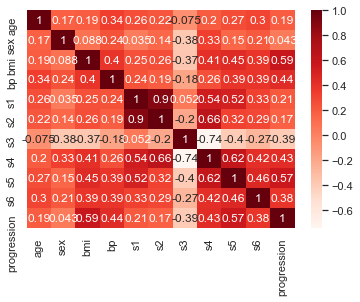

bmi            0.586450
s5             0.565883
progression    1.000000
Name: progression, dtype: float64


In [21]:
# Create correlation matrix and print it
cor = diabetes.corr()
print(cor)

# Correlation matrix heatmap
plt.figure()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Correlation with output variable
cor_target = abs(cor["progression"])

# Selecting highly correlated features
best_features = cor_target[cor_target > 0.5]
print(best_features)

In [22]:
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [23]:
X = diabetes.drop(columns = 'progression')
y = diabetes['progression']

In [24]:
# Instantiate estimator and feature selector
svr_mod = SVR(kernel="linear")
feat_selector = RFECV(svr_mod, cv=5)

# Fit
feat_selector = feat_selector.fit(X, y)

# Print support and ranking
print(feat_selector.support_)
print(feat_selector.ranking_)
print(X.columns)

[ True False  True  True  True  True  True  True  True  True]
[1 2 1 1 1 1 1 1 1 1]
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [25]:
# Drop feature suggested not important in step 2
X = X.drop('sex', axis=1)

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)

# Fit
feat_selector = lars_mod.fit(X,y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X, y))
print(lars_mod.alpha_)

0.4982900996498094
0.052268622851593095


**While filter and wrapper methods work pretty well for feature selection, tree-based selection methods can be even better.**

### Feature selection through feature importance

In [26]:
X = diabetes.drop(columns = 'progression')
y = diabetes['progression']

In [27]:
# Instantiate
rf_mod = RandomForestRegressor(max_depth=2, random_state=123, 
              n_estimators=100, oob_score=True)

# Fit
rf_mod.fit(X,y)

# Print
print(diabetes.columns)
print(rf_mod.feature_importances_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.         0.         0.39961579 0.03085607 0.         0.00128948
 0.00700339 0.00417891 0.53899467 0.01806168]


In [28]:
# Instantiate
xt_mod = ExtraTreesRegressor()

# Fit
xt_mod.fit(X, y)

# Print
print(diabetes.columns)
print(xt_mod.feature_importances_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.05720336 0.03308375 0.24839057 0.1235533  0.04726587 0.05162706
 0.06433822 0.07915228 0.2191649  0.07622067]


**Though both the Random Forest and Extra Trees ultimately methods have similar results, the output from the Random Forest are a bit more clear. Either way, one of the simplest ways to have an algorithm select features for you before training your machine learning models are tree-based methods such as these.**

### Lasso regularization

In [29]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated lasso, fit
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# Instantiate lasso, fit, predict and print MSE
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=lasso.predict(X_test)))

2924.585983289739


**Keep in mind the MSE of 2924, which is the average error using cross-validated lasso regression. Let's see if it can be improved or not by practicing cross-validated ridge regression!**

### Ridge regularization

In [30]:
# Instantiate cross-validated ridge, fit
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_cv.fit(X_train, y_train)

# Instantiate ridge, fit, predict and print MSE
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test)))

2970.874355984402


### Logistic regression baseline classifier

![Pipeline](pipeline-9.png)

In [31]:
# Convert income: monthly_income
monthly_income = loan_data["Annual Income"]/12

# Make engineered feature, remove features used
loan_data["dti_ratio"] = loan_data["Monthly Debt"]/monthly_income * 100
loan_data = loan_data.drop(["Monthly Debt","Annual Income"], axis=1)

## Unsupervised Learning

### Principal component analysis

One way of reducing dimensionality is principal component analysis. It's an effective way of reducing the size of the data by creating new features that preserve the most useful information on a dataset while at the same time removing multicollinearity.

In [32]:
# Feature matrix and target array
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

# PCA
pca = PCA(n_components=3)

# Fit and transform
principalComponents = pca.fit_transform(X)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)

[0.40242142 0.14923182 0.12059623]


**The first PC explains 40% of the variance with all 3 around 67%. Let's see if singular value decomposition gives different results!**

### Singular value decomposition

In [33]:
# SVD
svd = TruncatedSVD(n_components=3)

# Fit and transform
principalComponents = svd.fit_transform(X)

# Print ratio of variance explained
print(svd.explained_variance_ratio_)

[0.40242142 0.14923182 0.12059623]


**It looks like they both perform exactly the same with this dataset!**

In [34]:
# Feature matrix and target array
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

# PCA
pca = PCA(n_components=6)

# Fit and transform
principalComponents = pca.fit_transform(X)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)

[0.40242142 0.14923182 0.12059623 0.09554764 0.06621856 0.06027192]


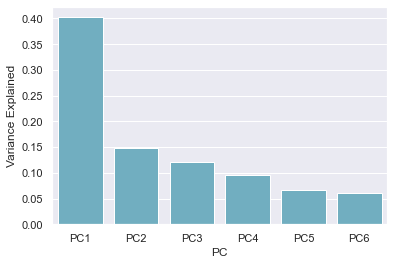

In [35]:
# List principal components names
principal_components = ['PC1','PC2','PC3','PC4','PC5','PC6']

# Create a DataFrame
pca_df = pd.DataFrame({'Variance Explained': pca.explained_variance_ratio_,
             'PC':principal_components})

# Plot DataFrame
sns.barplot(x='PC',y='Variance Explained', 
           data=pca_df, color="c")
plt.show()

In [36]:
# Instantiate, fit and transform
pca2 = PCA()
principalComponents2 = pca2.fit_transform(X)

# Assign variance explained
var = pca2.explained_variance_ratio_

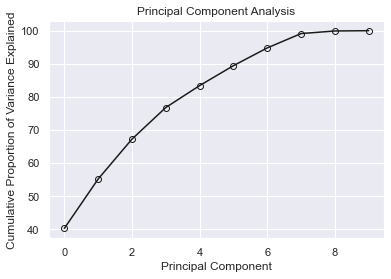

In [37]:
# Plot cumulative variance
cumulative_var = np.cumsum(var)*100
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
plt.show()

**The first 6 principal components explain 90% of the variance in loan_data. That's pretty good considering the original dataset has more than 10 features!**

### Clustering analysis: selecting the right clustering algorithm

#### K-means clustering

In [62]:
# Create feature matrix
X = diabetes.drop("progression", axis=1)

# Instantiate
n_clusters = [2, 5, 10, 20]

for cluster in n_clusters:
    kmeans = KMeans(n_clusters=cluster, random_state=123)
    fit = kmeans.fit(X)
    print("Sum of squared distances for {} clusters is {}".format(cluster, kmeans.inertia_))

Sum of squared distances for 2 clusters is 7.187000018583654
Sum of squared distances for 5 clusters is 5.5541125642960445
Sum of squared distances for 10 clusters is 4.364631179118139
Sum of squared distances for 20 clusters is 3.516404544955704


#### Hierarchical agglomerative clustering

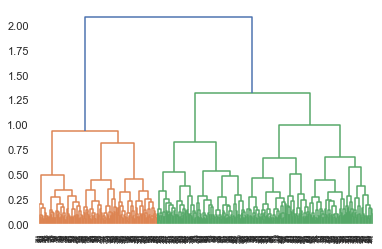

2


In [56]:
# Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

# Create clusters and fit
hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
hc.fit(X)

# Print number of clusters
print(hc.n_clusters_)

**It might be surprising to note that both the `dendrogram` and the `AgglomerativeClustering()` algorithm selected 2 clusters with diabetes, even though the `.inertia_` using `KMeans` was the highest with `n_clusters`=2.** 

### Silhouette method

In [58]:
# Feature matrix
X = diabetes.drop("progression", axis=1)

# For loop
for n_clusters in range(2,9):
    kmeans = KMeans(n_clusters=n_clusters)
    # Fit and predict your k-Means object
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.23698717031681765)
For n_clusters = 3, silhouette score is 0.15243304093216897)
For n_clusters = 4, silhouette score is 0.14001644308533515)
For n_clusters = 5, silhouette score is 0.14400806529135182)
For n_clusters = 6, silhouette score is 0.14315346070256652)
For n_clusters = 7, silhouette score is 0.14074404204605315)
For n_clusters = 8, silhouette score is 0.14072598759659366)


**So the highest `silhouette_score` for the diabetes dataset is with `n_clusters=2`.** 

#### Elbow method

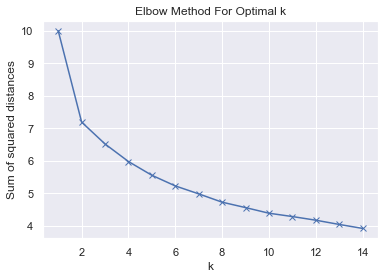

In [63]:
# Create empty list
sum_of_squared_distances = []

# Create for loop
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot
plt.plot(range(1,15), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**The `AgglomerativeClustering()`, `dendrogram`, `silhouette_score`, and `elbow method` all agree! The best value for k with the diabetes dataset is 2! And really that makes sense if you think about it. The target variable progression, even though it is continuous, can be thought of as belonging to one of 2 groups. When compared to a previous baseline measurement, a given person's diabetes has either progressed or it hasn't!**

## Model Selection and Evaluation

![Pipeline](pipeline-10.png)

In [97]:
final_DF['Loan Status'] = final_DF['Loan Status'].replace({'Charged Off': 0, 'Fully Paid': 1}, inplace=True)

In [106]:
X = final_DF.drop(['Loan Status'], axis = 1)
y = final_DF['Loan Status'] 

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [108]:
final_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   0 non-null      object 
 1   Term                          88910 non-null  object 
 2   Home Ownership                88910 non-null  object 
 3   Purpose                       88910 non-null  object 
 4   Current Loan Amount           88910 non-null  float64
 5   Credit Score                  67572 non-null  float64
 6   Years in current job          88910 non-null  float64
 7   Annual Income                 67572 non-null  float64
 8   Monthly Debt                  88910 non-null  float64
 9   Years of Credit History       88910 non-null  float64
 10  Months since last delinquent  40404 non-null  float64
 11  Number of Open Accounts       88910 non-null  float64
 12  Number of Credit Problems     88910 non-null  float64
 13  C

### Multicollinearity techniques - feature engineering

In [109]:
X = diabetes.drop('progression', axis = 1)
y  = diabetes['progression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [113]:
# Instantiate, fit, predict
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)
y_pred = lin_mod.predict(X_test)

# Coefficient estimates
print('Coefficients: \n', lin_mod.coef_)

# Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score
print('R_squared score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [  10.45384922 -261.16601105  538.84541221  280.72544466 -855.21447839
  472.17305267  166.51881384  309.88763264  684.0489522   102.37723262]
Mean squared error: 2926.80
R_squared score: 0.51


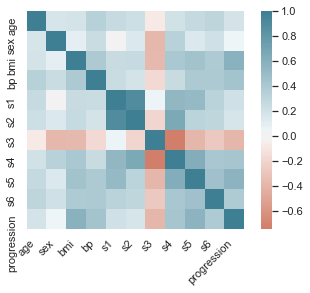

                  age       sex       bmi        bp        s1        s2  \
age          1.000000  0.173737  0.185085  0.335427  0.260061  0.219243   
sex          0.173737  1.000000  0.088161  0.241013  0.035277  0.142637   
bmi          0.185085  0.088161  1.000000  0.395415  0.249777  0.261170   
bp           0.335427  0.241013  0.395415  1.000000  0.242470  0.185558   
s1           0.260061  0.035277  0.249777  0.242470  1.000000  0.896663   
s2           0.219243  0.142637  0.261170  0.185558  0.896663  1.000000   
s3          -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455   
s4           0.203841  0.332115  0.413807  0.257653  0.542207  0.659817   
s5           0.270777  0.149918  0.446159  0.393478  0.515501  0.318353   
s6           0.301731  0.208133  0.388680  0.390429  0.325717  0.290600   
progression  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054   

                   s3        s4        s5        s6  progression  
age         -0.075181  0.203841 

In [114]:
# Correlation matrix
diab_corr = diabetes.corr()

# Generate correlation heatmap
ax = sns.heatmap(diab_corr, center=0, cmap=sns.diverging_palette(20,220, n=256), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Print correlations
print(diab_corr)

In [115]:
# Feature engineering
diabetes['s1_s2'] = diabetes['s1'] * diabetes['s2']
diabetes = diabetes.drop(['s1','s2'], axis=1)

# Print variable names
print(diabetes.columns)

# Train/test split
X2 = diabetes.drop('progression', axis=1)
y2 = diabetes['progression']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=123)

Index(['age', 'sex', 'bmi', 'bp', 's3', 's4', 's5', 's6', 'progression',
       's1_s2'],
      dtype='object')


In [116]:
# Instantiate, fit, predict
lin_mod2 = LinearRegression()
lin_mod2.fit(X_train2, y_train2)
y_pred2 = lin_mod2.predict(X_test2)

# Coefficient estimates
print('Coefficients: \n', lin_mod2.coef_)

# Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test2, y_pred2))

# Explained variance score
print('R_squared score: %.2f' % r2_score(y_test2, y_pred2))

Coefficients: 
 [  -2.33325625 -250.45569362  541.16674251  260.86592129 -338.13983816
  -47.01999461  430.98561453   94.21041896 -283.69973876]
Mean squared error: 2910.42
R_squared score: 0.51


**Well, it looks like we got the same R-squared score, but the MSE is slightly lower!**

### Multicollinearity techniques - PCA

In [117]:
# Import
from sklearn.decomposition import PCA

# Instantiate
pca = PCA()

# Fit on train
pca.fit(X_train)

# Transform train and test
X_trainPCA = pca.transform(X_train)
X_testPCA = pca.transform(X_test)

In [118]:
# Import
from sklearn.linear_model import LinearRegression

# Instantiate, fit, predict
LinRegr = LinearRegression()
LinRegr.fit(X_trainPCA, y_train)
predictions = LinRegr.predict(X_testPCA)

# The coefficients
print('Coefficients: \n', LinRegr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

Coefficients: 
 [  431.83041038  -293.77173602   253.57573406   568.70922969
   -67.51943277  -186.26488336    71.89012557    47.21891689
    93.98511769 -1130.48023791]
Mean squared error: 2926.80
Variance score: 0.51


In [119]:
# Genearate correlation heatmap


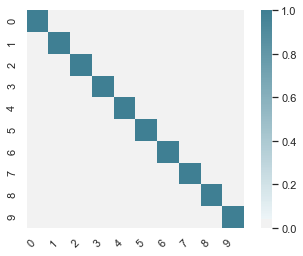

              0             1             2             3             4  \
0  1.000000e+00 -3.466536e-17  3.005816e-16  1.649939e-16 -9.521843e-16   
1 -3.466536e-17  1.000000e+00  4.660816e-16 -6.640762e-17  6.539659e-17   
2  3.005816e-16  4.660816e-16  1.000000e+00  3.340359e-16 -7.674704e-17   
3  1.649939e-16 -6.640762e-17  3.340359e-16  1.000000e+00  1.116517e-16   
4 -9.521843e-16  6.539659e-17 -7.674704e-17  1.116517e-16  1.000000e+00   
5 -5.012190e-16  2.174121e-16 -5.281937e-17  8.491655e-17  2.070404e-16   
6 -2.296643e-16  1.541340e-16 -2.923695e-16  2.137891e-17 -2.030928e-16   
7 -8.751752e-17  1.146410e-16 -1.370769e-16 -1.569098e-16  2.253787e-16   
8  4.856053e-17 -1.377656e-15  4.379280e-16 -2.167497e-16  5.781779e-16   
9  1.540120e-15 -2.083591e-18  3.294193e-16  8.558624e-16  4.131414e-16   

              5             6             7             8             9  
0 -5.012190e-16 -2.296643e-16 -8.751752e-17  4.856053e-17  1.540120e-15  
1  2.174121e-16  1.541340e

In [120]:
# Correlation matrix
X_trainPCA = pd.DataFrame(X_trainPCA)
diab_corrPCA = X_trainPCA.corr()

# Generate correlation heatmap
ax = sns.heatmap(diab_corrPCA, center=0, cmap=sns.diverging_palette(20,220, n=256), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Print correlations
print(diab_corrPCA)

**This simple change, although it didn't improve your metrics, removed all of the multicollinearity in the `diabetes` dataset!**